## Visualize time series data using a line chart, bar chart, and box plots. Use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help understand the patterns in visits and identify yearly and monthly growth.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Read file 

In [28]:
df=pd.read_csv('Desktop/fcc-forum-pageviews.CSV')
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


### Make date the index

In [29]:
df['date']=pd.to_datetime(df['date'])

In [30]:
df.index=df.date

In [31]:
df=df.drop('date',axis=1)

### Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [32]:
df_clean=df[(df['value']>=df['value'].quantile(0.025)) & (df['value']<=df['value'].quantile(0.975))]
df_clean.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


### Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to below shown figure. The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".

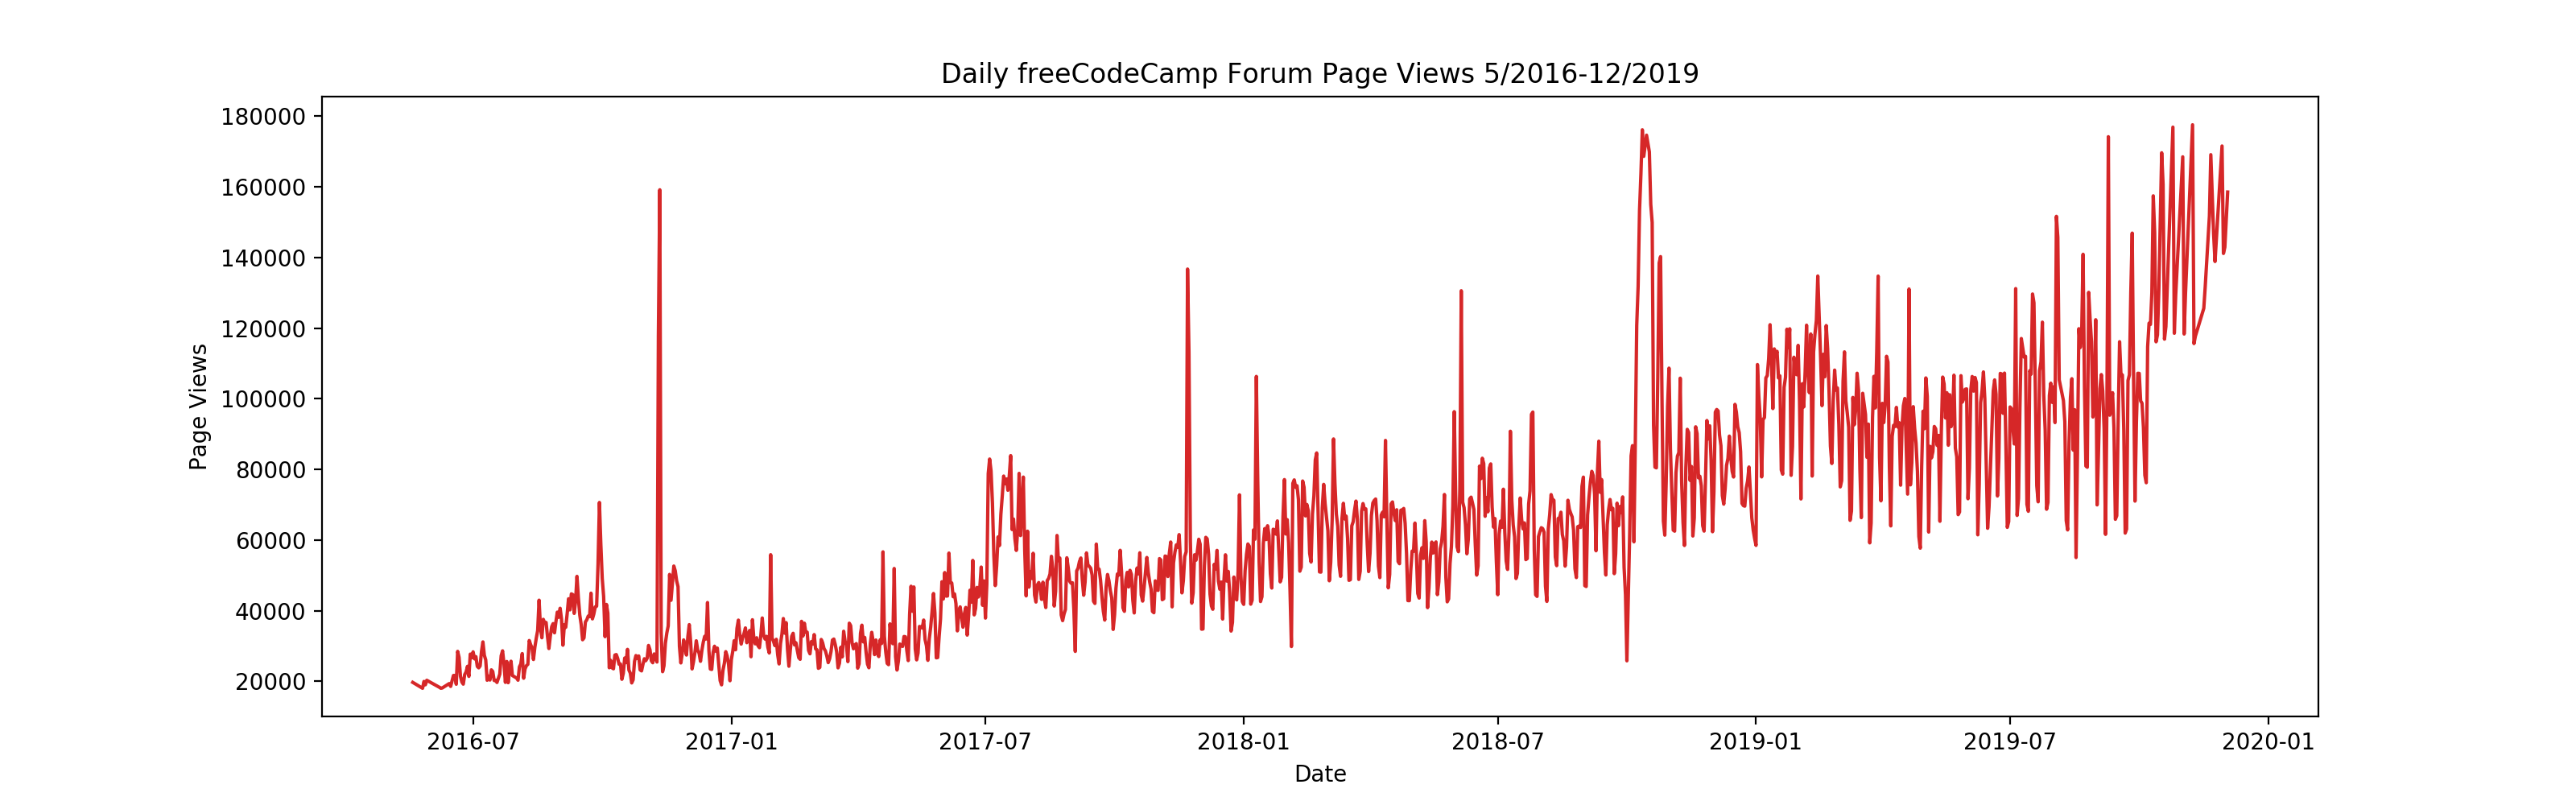

In [33]:
def draw_line_plot():
    fig=plt.figure(figsize=(15,5))
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.plot(df_clean.index,df_clean['value'],color='red')
    fig=fig.savefig('line_plot.png')
    return fig

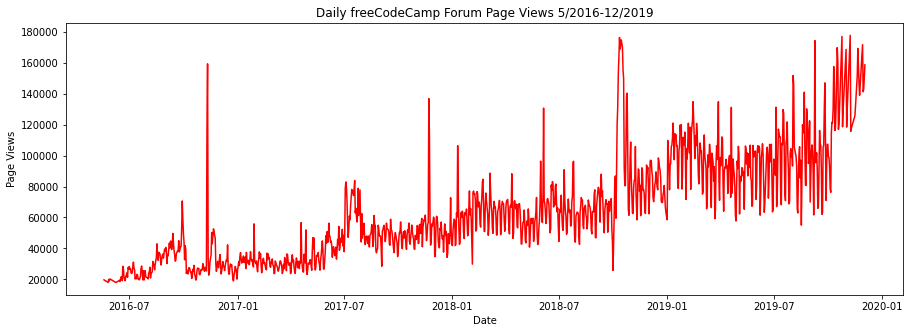

In [34]:
draw_line_plot()

### Create a draw_bar_plot function that draws a bar chart similar to below given figure. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
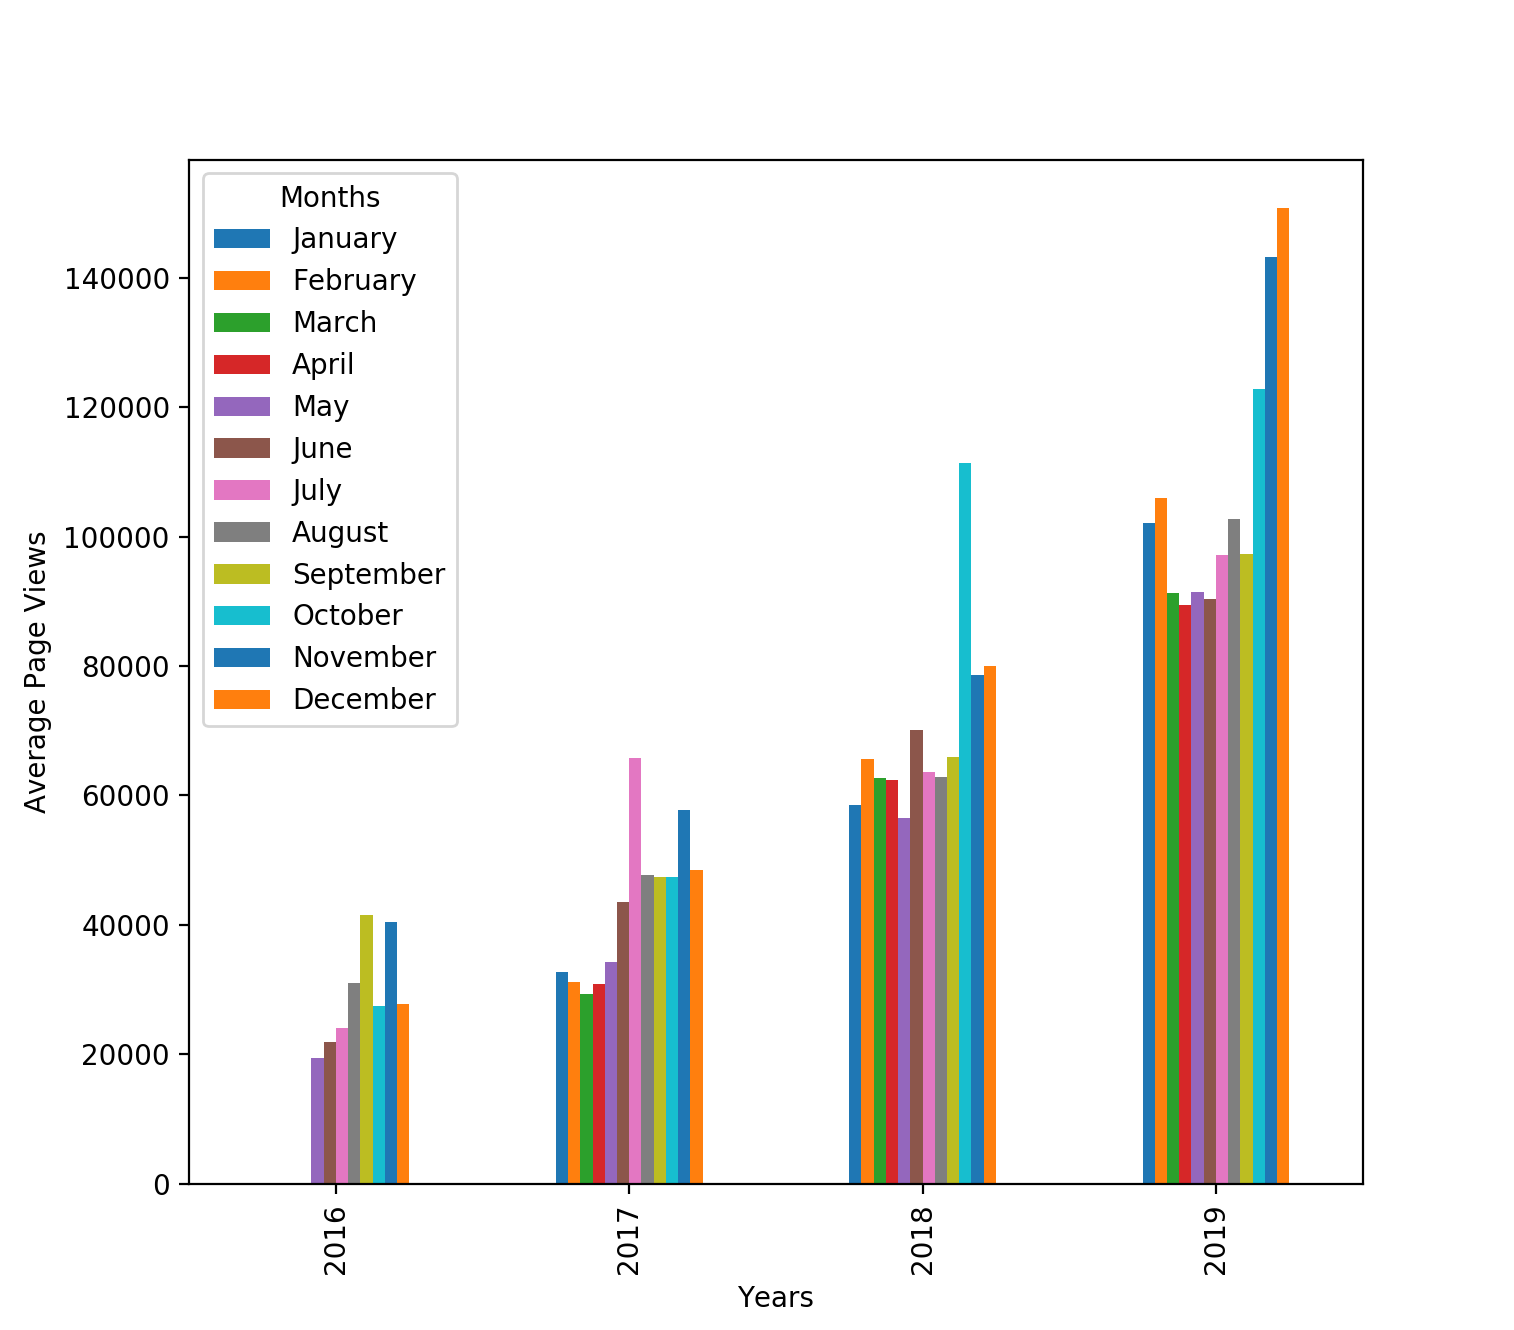

In [35]:
def draw_bar_plot():
    df_bar=df_clean.copy()
    df_bar['month']=df_bar.index.month_name()
    df_bar['year']=df_bar.index.year
    df_bar=df_bar.groupby(['month','year']).mean('value')
    fig=df_bar.unstack(0).plot.bar(figsize=(15,6))
    fig.set_xlabel('Years')
    fig.set_ylabel('Average page views')
    plt.legend(labels=["January","February","March","April","May","June","July","August","September","October","November","December"])
    fig=fig.figure.savefig('bar_plot.png')
    return fig

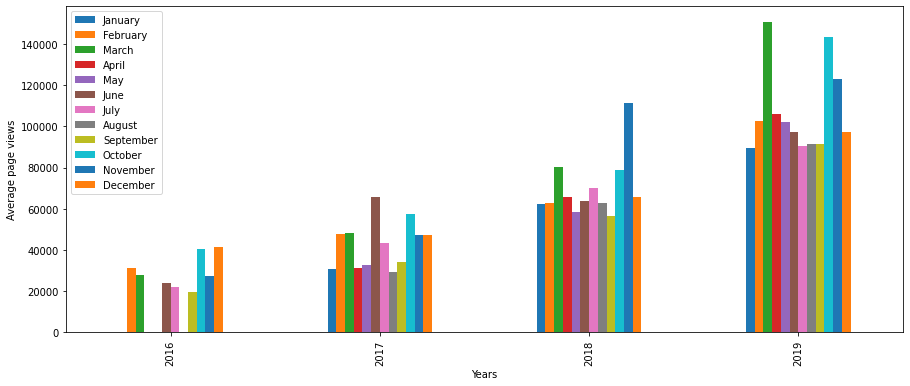

In [36]:
draw_bar_plot()

### Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to following figure. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and y axis are labeled correctly. 
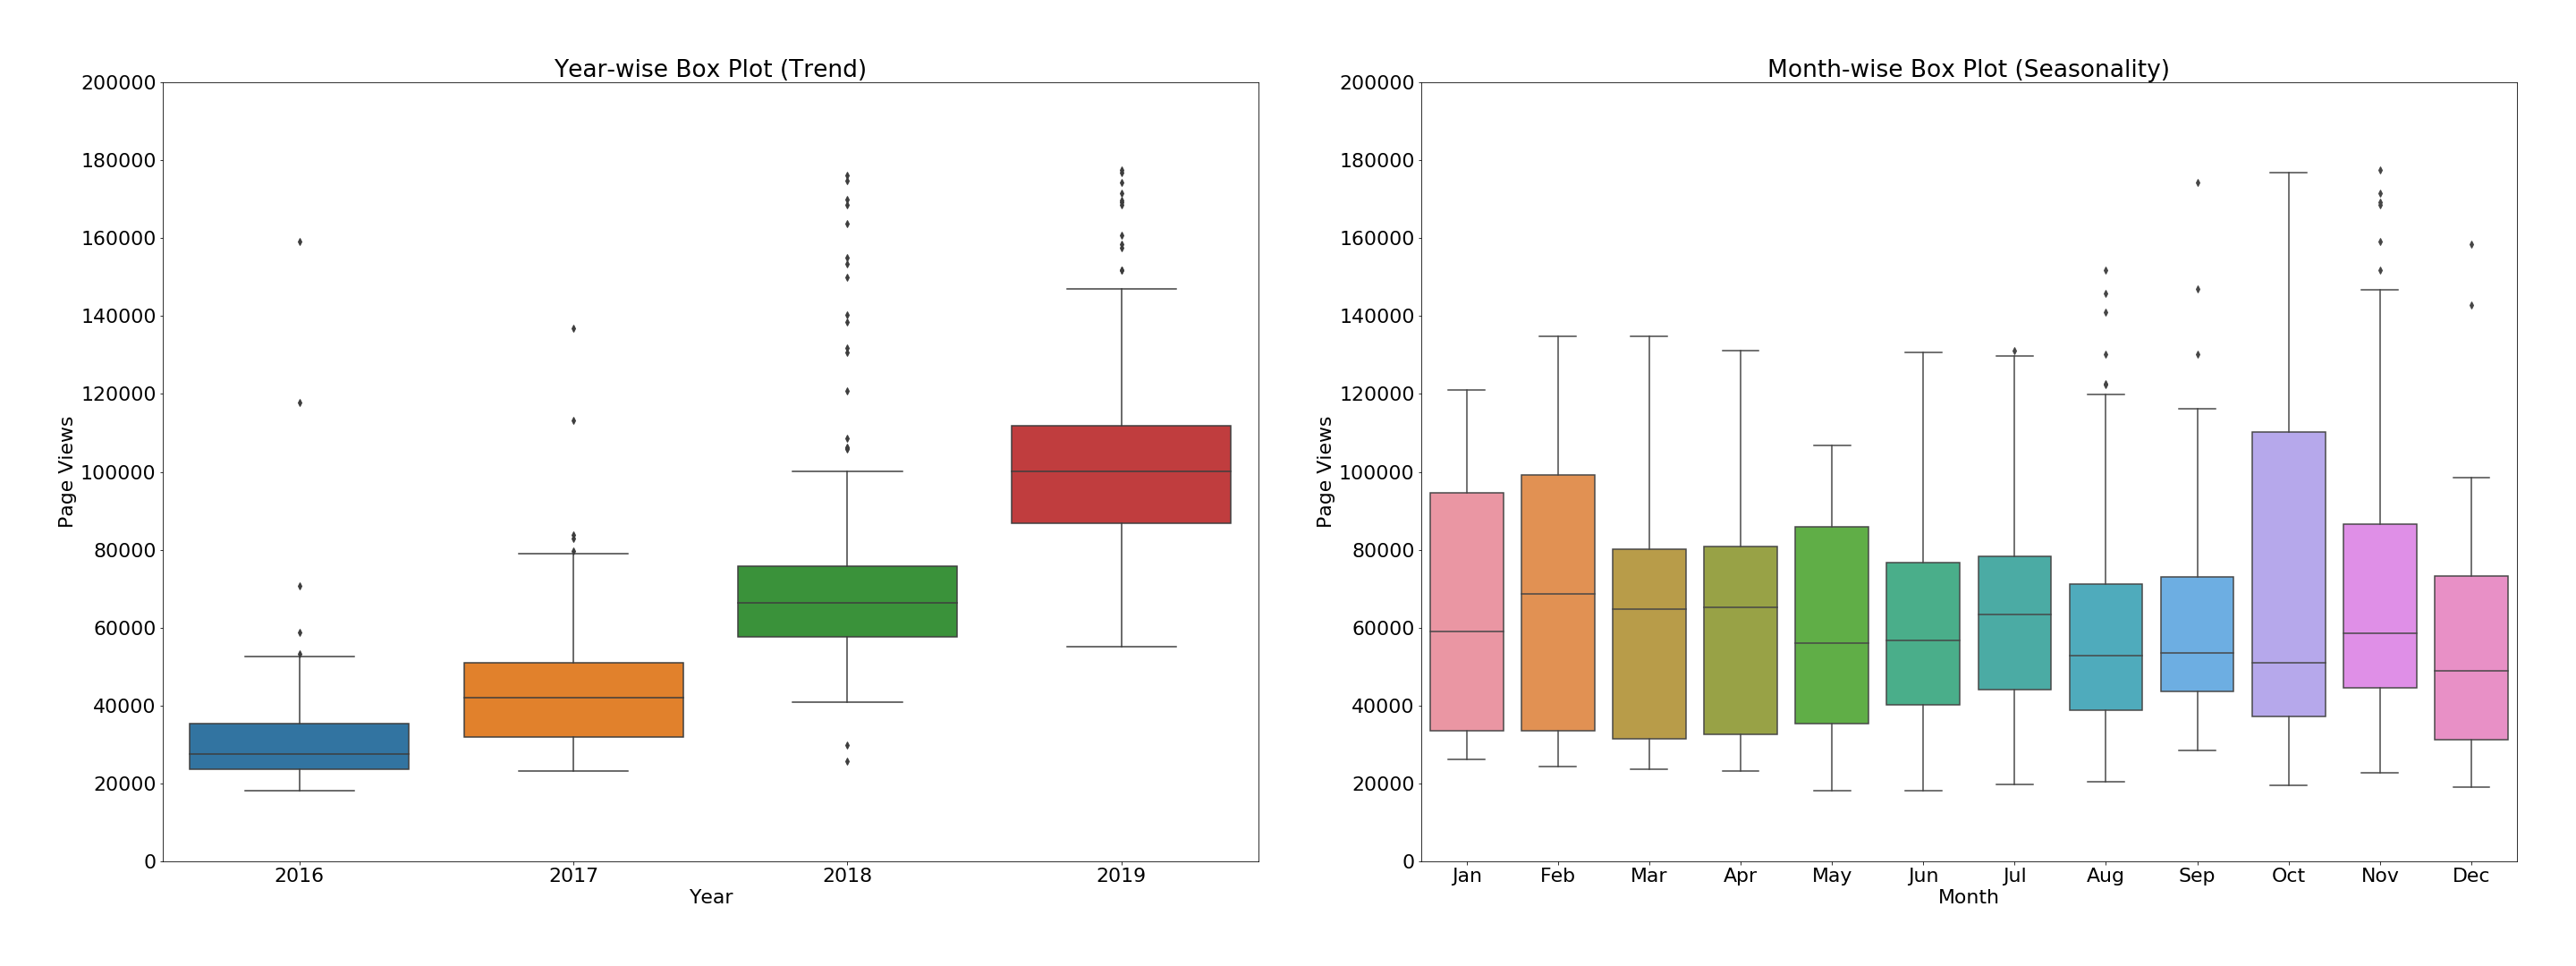

In [40]:
def draw_box_plot():
    df_box = df_clean.copy()
    df_box['month']=df_box.index.month_name()
    df_box['year']=df_box.index.year
    
    fig,ax=plt.subplots(1,2,figsize=(25,7))
    
    ax1=sns.boxplot(x='year',y='value',data=df_box,ax=ax[0])
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page views')

    ax2=sns.boxplot(x='month',y='value',order=['January','February','March','April','May','June','July','August','September','October','November','December'],data=df_box,ax=ax[1])
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page views')
    fig=fig.savefig('box_plot.png')
    return fig

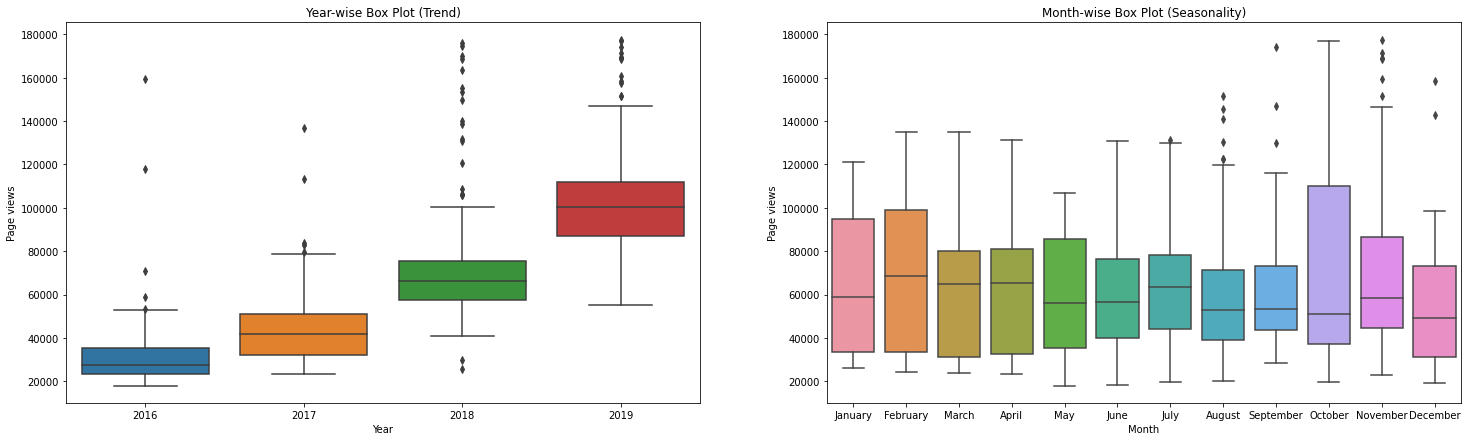

In [41]:
draw_box_plot()